In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('kmeans_data.txt', 'r') as file:
    lines = file.readlines()

In [3]:
x1_kmeans = []
x2_kmeans = []

for line in lines:
    x1, x2 = map(float, line.split())
    
    x1_kmeans.append(x1)
    x2_kmeans.append(x2)
    
x = np.array(list(zip(x1_kmeans, x2_kmeans)))

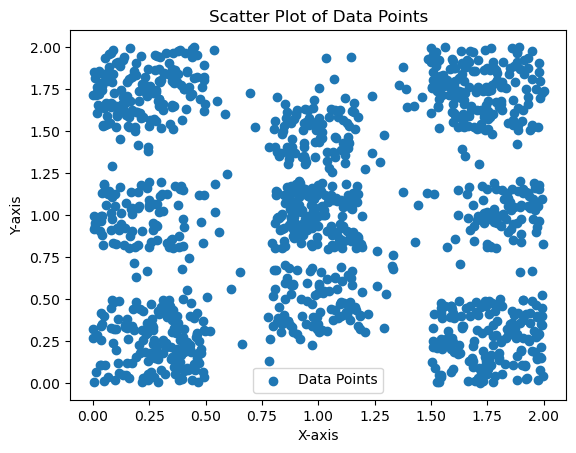

In [4]:
# Create a scatter plot
plt.scatter(x1_kmeans, x2_kmeans, label='Data Points')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Data Points')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [6]:
kmeans = KMeans(n_clusters=9, random_state=0).fit(x)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

/home/steph/miniconda3/envs/torch/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [7]:
cluster_indices, distances_to_centers = pairwise_distances_argmin_min(x, kmeans.cluster_centers_)
# Sum the distances for each center
total_distances_for_each_center = np.zeros(9)
for i in range(len(x)):
    total_distances_for_each_center[cluster_indices[i]] += distances_to_centers[i]

# Print the results
total_distance = 0
for j in range(9):
    total_distance += total_distances_for_each_center[j]
    print(f"Cluster {j + 1}: Total distance to its points = {total_distances_for_each_center[j]}")

print(f"Total distance = {total_distance}")

Cluster 1: Total distance to its points = 32.822188779244186
Cluster 2: Total distance to its points = 18.22585776250533
Cluster 3: Total distance to its points = 17.854675936259852
Cluster 4: Total distance to its points = 32.194379071437446
Cluster 5: Total distance to its points = 25.220051504402733
Cluster 6: Total distance to its points = 14.516704159121286
Cluster 7: Total distance to its points = 30.426312593510783
Cluster 8: Total distance to its points = 30.087383871357762
Cluster 9: Total distance to its points = 15.980378694432
Total distance = 217.32793237227136


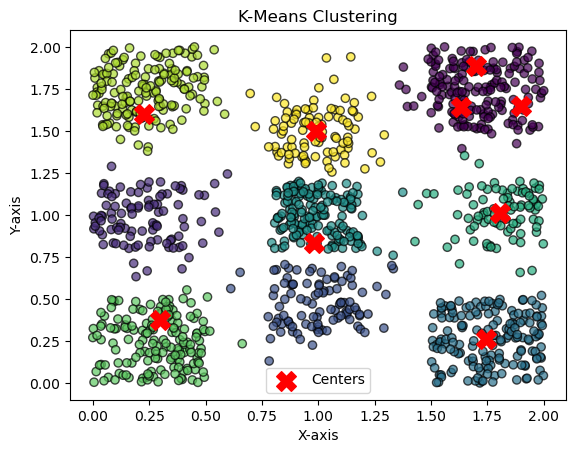

In [11]:
# Plot the data points with different colors for each cluster
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', alpha=0.7, edgecolors='k')

# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centers')

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('K-Means Clustering')
plt.legend()

# Show the plot
plt.show()

In [10]:
centers = np.array([(1.743373, 0.263795),
                    (0.298248, 0.376050),
                    (1.805290, 1.012367),
                    (1.633988, 1.639920),
                    (0.982585, 0.835843),
                    (0.989173, 1.497890),
                    (1.697152, 1.884935),
                    (1.897862, 1.647748),
                    (0.226706, 1.599980)
])